In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os,sys
import pylab as plt
%matplotlib inline
from pylab import get_cmap
import glob


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
src_dir = '../src'
sys.path.append(src_dir)
from jsd import jsdalpha

In [9]:
src_meta = '../../gutenberg-frozen-2018-07-18/src/'
sys.path.append(src_meta)
from metaquery import meta_query


In [10]:
# Load meta data

In [1]:
# meta=meta_query(path=src_meta+'../metadata/metadata.csv')

# Loop Textlengths

- open each file in counts, sum

In [11]:
## loop over all books and get number of tokens
path_text = os.path.abspath(os.path.join(src_meta,os.pardir,'data','text'))
list_N = []
for file in list(glob.glob( path_text+'/PG*_text.txt' )):
    with open(file) as f:
        x = f.readlines()
    N = len(x)
    list_N += [N]

In [12]:
len(list_N)

55905

# Plot

In [13]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 510  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = (np.sqrt(5)-1.0)/2.0 # Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
fig_size = [fig_width,fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'backend': 'ps',
          'axes.titlesize':16,
          'axes.labelsize': 14,
          'text.fontsize': 12,
          'legend.fontsize': 12,
#           'figtext.fontsize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          
          'text.usetex': True,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          'text.latex.unicode':True,
          'text.latex.preamble': [r'\usepackage{bm}'],
          
          'xtick.direction':'out',
          'ytick.direction':'out',
          
          'axes.spines.right' : False,
          'axes.spines.top' : False
         }
plt.rcParams.update(params)

/home/martin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


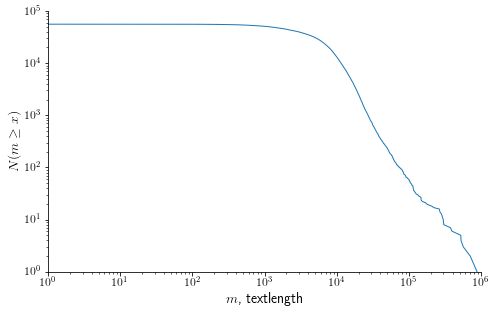

In [36]:
n = len(list_N)
x = np.sort(np.array(list_N))
y = (np.arange(n)+1)


# f=plt.figure(figsize = (10,20))
f=plt.figure()
ax=f.add_subplot(1,1,1)


ax.plot(x,n-y,lw=1)
ax.set_xlabel(r'$m$, textlength')
ax.set_ylabel(r'$N(m \geq x)$')

# ax.set_ylim(0.00001,1)
ax.set_ylim(1,10**5)

ax.set_xlim(10**0,10**6)
ax.set_xscale('log')
ax.set_yscale('log')
# plt.subplots_adjust(left=0.1,bottom=0.4)

path_save = os.path.join(os.pardir,'figures')
fname_save = 'basicstats-textlength.pdf'
filename = os.path.join(path_save,fname_save)
plt.savefig(filename)